## OBJECTIVE :
* 3,5,7 layer architecture using 2x2,3x3,5x5 kernel size and dropouts

In [1]:
# Used to solve the activation error
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

### THIS IS SIMPLE 2 LAYER ARCHITECTURE

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [4]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
batch_size = 256
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:


model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.3524 - acc: 0.8912 - val_loss: 0.0711 - val_acc: 0.9777
Epoch 2/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.1021 - acc: 0.9698 - val_loss: 0.0474 - val_acc: 0.9839
Epoch 3/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0750 - acc: 0.9781 - val_loss: 0.0387 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0617 - acc: 0.9819 - val_loss: 0.0357 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0534 - acc: 0.9842 - val_loss: 0.0318 - val_acc: 0.9893
Epoch 6/12
60000/60000 [

Test score: 0.028766267241639436
Test accuracy: 0.9906


<IPython.core.display.Javascript object>


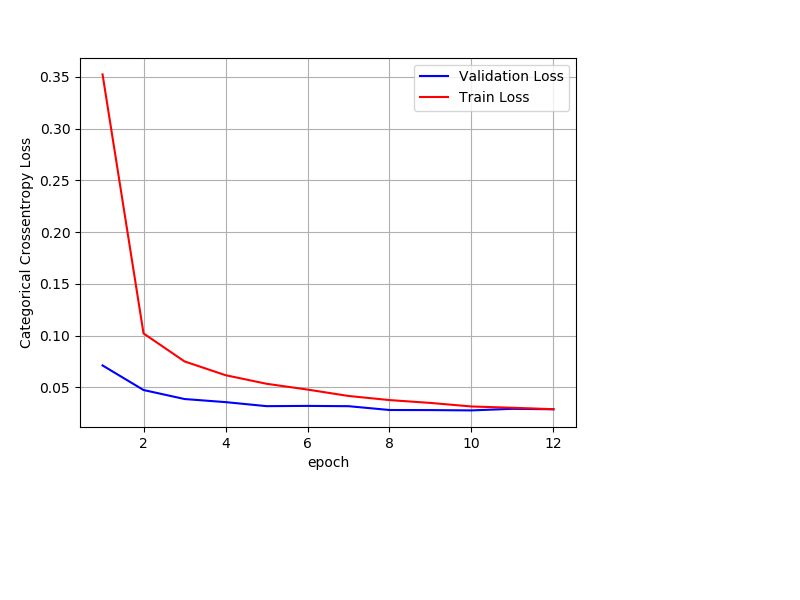

In [6]:
score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3 LAYER ARCHITECTURE USING 2X2 KERNEL

In [7]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(2,2),
                 activation='relu',
                 input_shape=input_shape))

model_2.add(Conv2D(64, (2,2), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (2,2), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

model_2.add(Flatten())

model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 161us/step - loss: 0.4133 - acc: 0.8697 - val_loss: 0.0828 - val_acc: 0.9733
Epoch 2/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0941 - acc: 0.9707 - val_loss: 0.0585 - val_acc: 0.9811
Epoch 3/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0638 - acc: 0.9799 - val_loss: 0.0348 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0519 - acc: 0.9835 - val_loss: 0.0346 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0434 - acc: 0.9863 - val_loss: 0.0334 - val_acc: 0.9881
Epoch 6/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0257 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0334 - acc: 0.9893 - val_loss: 0.0230 -

Test score: 0.020205720604113596
Test accuracy: 0.9928


<IPython.core.display.Javascript object>


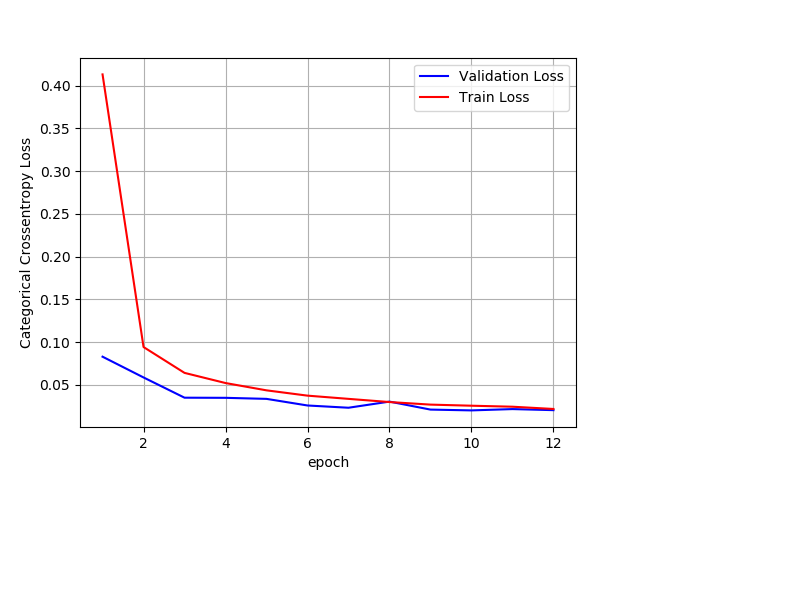

In [8]:
score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 5 LAYER ARCHITECTURE USING 3x3 KERNEL AND 5X5 KERNEL

In [5]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [6]:
model_3 = Sequential()

model_3.add(Conv2D(32, kernel_size=5,input_shape=(28, 28, 1), activation = 'relu'))
model_3.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model_3.add(MaxPool2D(2,2))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))

model_3.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model_3.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model_3.add(MaxPool2D(2,2))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))

model_3.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model_3.add(BatchNormalization())

model_3.add(Flatten())
model_3.add(Dense(256, activation = "relu"))
model_3.add(Dropout(0.4))
model_3.add(Dense(128, activation = "relu"))
model_3.add(Dropout(0.4))
model_3.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

           
model_3.summary()

history = model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          36928     
__________

Test score: 0.021792678804213938
Test accuracy: 0.9941


<IPython.core.display.Javascript object>


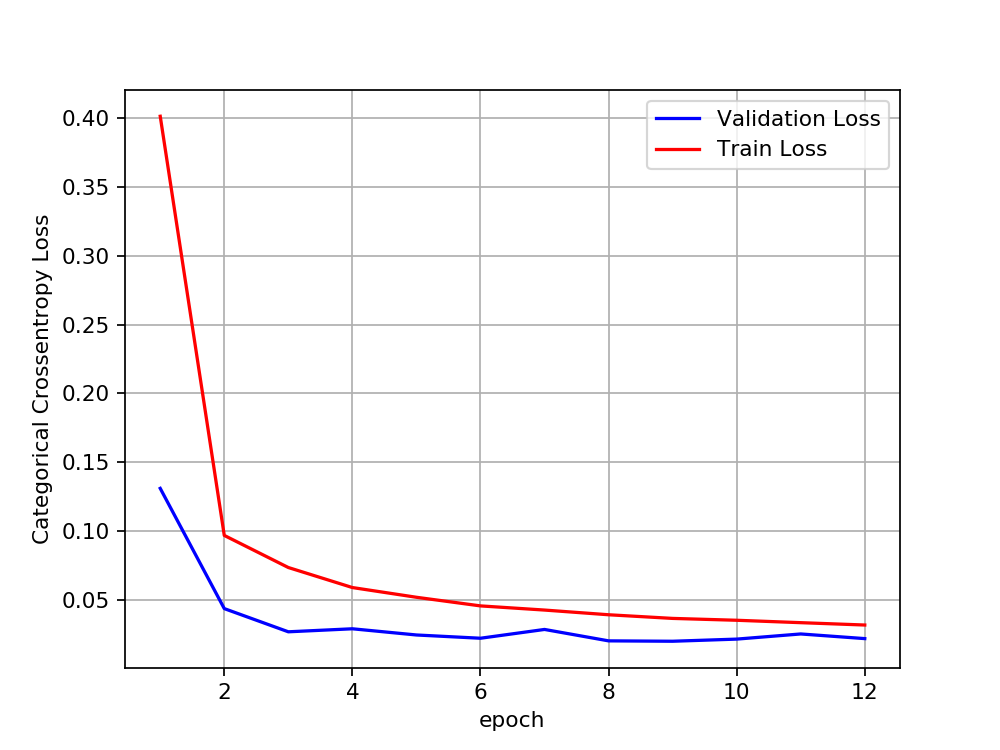

In [8]:
score = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_3drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 7 LAYER ARCHITECTURE USING 5x5 KERNEL

In [16]:
model_4 = Sequential()
model_4.add(Conv2D(16, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))

model_4.add(Conv2D(16, (3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(1, 1)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(32, (3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(1, 1)))
model_4.add(Dropout(0.5))

model_4.add(Conv2D(32, (3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(1, 1)))
model_4.add(Dropout(0.5))

model_4.add(Conv2D(64, (3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.5))

model_4.add(Conv2D(64, (3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.5))

model_4.add(Conv2D(128, (3,3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(1, 1)))
model_4.add(Dropout(0.5))

model_4.add(Flatten())

model_4.add(Dense(256, activation='relu'))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 22, 22, 32)        0         
__________

In [17]:
model_4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model_4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.9350 - acc: 0.6871 - val_loss: 0.2993 - val_acc: 0.9079
Epoch 2/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.3137 - acc: 0.9029 - val_loss: 0.1221 - val_acc: 0.9612
Epoch 3/12
60000/60000 [==============================] - 13s 210us/step - loss: 0.2208 - acc: 0.9331 - val_loss: 0.0966 - val_acc: 0.9713
Epoch 4/12
60000/60000 [==============================] - 13s 214us/step - loss: 0.1773 - acc: 0.9468 - val_loss: 0.1056 - val_acc: 0.9757
Epoch 5/12
60000/60000 [==============================] - 13s 214us/step - loss: 0.1510 - acc: 0.9557 - val_loss: 0.0610 - val_acc: 0.9820
Epoch 6/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.1353 - acc: 0.9601 - val_loss: 0.0640 - val_acc: 0.9812
Epoch 7/12
60000/60000 [==============================] - 13s 210us/step - loss: 0.1206 - acc: 0.9649 - val_loss: 0.

Test score: 0.04208738370714709
Test accuracy: 0.9887


<IPython.core.display.Javascript object>


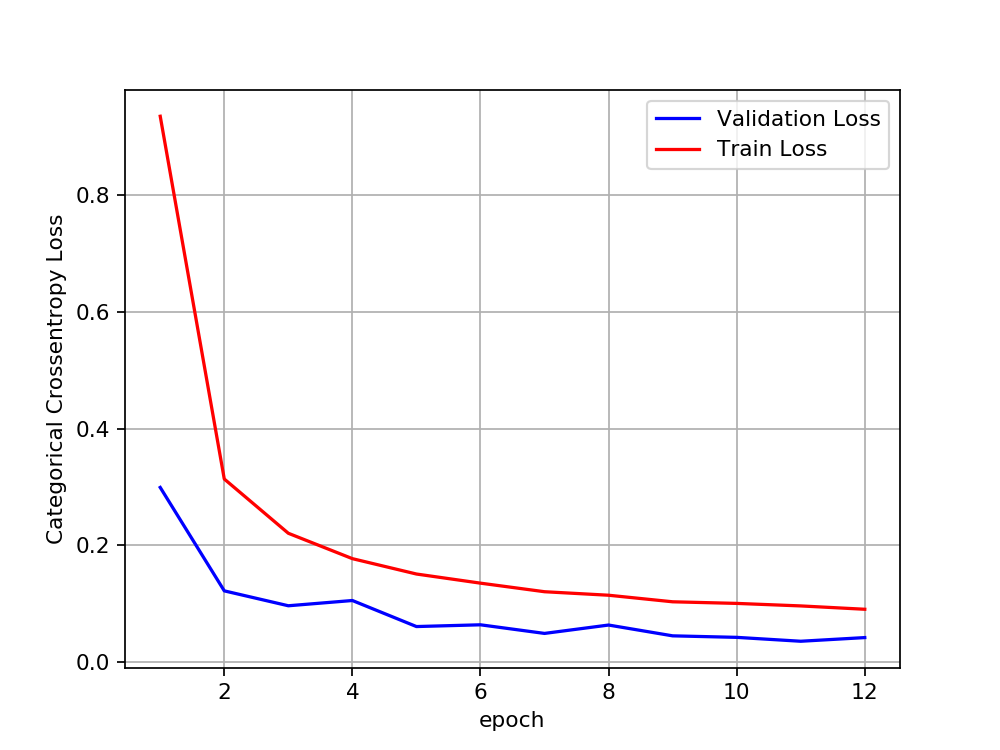

In [18]:
score = model_4.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_4drop.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### PROCEDURE :
* STEP 1 => load the MNIST dataset
* STEP 2 => spilt the datset into train and test
* STEP 3 => Creating 3 models - 3-layer,5-layer,7-layer architecture
* STEP 4 => Using 2x2 ,3x3 and 5x5 kernel for 3-layer,5-layer,7-layer respectively.
* STEP 5 => using dropouts and maxpooling in each layer in each architecture
* STEP 6 => fit and validate and seen results of each architecture 
* STEP 7 => Construct Pretty Table

In [20]:
from prettytable import PrettyTable

pretty = PrettyTable()

pretty.field_names = ['S.No','MODEL','train_accuracy','test_accuracy','train_loss','test_loss']

pretty.add_row(['1','2-LAYER WITH KERNEL SIZE 2X2','0.9909','0.9906','0.0288','0.0288'])
pretty.add_row(['2','3-LAYER WITH KERNEL SIZE 2X2','0.9926','0.9928','0.0216','0.0202'])
pretty.add_row(['3','5-LAYER WITH KERNEL SIZE 3X3 ','0.9907','0.9941','0.0317','0.0218'])
pretty.add_row(['4','7-LAYER WITH KERNEL SIZE 5X5','0.9735 ','0.9887','0.0906','0.0420'])


print(pretty)

+------+-------------------------------+----------------+---------------+------------+-----------+
| S.No |             MODEL             | train_accuracy | test_accuracy | train_loss | test_loss |
+------+-------------------------------+----------------+---------------+------------+-----------+
|  1   |  2-LAYER WITH KERNEL SIZE 2X2 |     0.9909     |     0.9906    |   0.0288   |   0.0288  |
|  2   |  3-LAYER WITH KERNEL SIZE 2X2 |     0.9926     |     0.9928    |   0.0216   |   0.0202  |
|  3   | 5-LAYER WITH KERNEL SIZE 3X3  |     0.9907     |     0.9941    |   0.0317   |   0.0218  |
|  4   |  7-LAYER WITH KERNEL SIZE 5X5 |    0.9735      |     0.9887    |   0.0906   |   0.0420  |
+------+-------------------------------+----------------+---------------+------------+-----------+
